# 실습: 기본 CNN으로 MNIST 분류하기
목표: 가장 기본적인 CNN을 구축하여 손글씨 숫자를 분류해보세요.

In [11]:
!pip show tensorflow



Name: tensorflow
Version: 2.16.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /Users/ismoil/tfenv/lib/python3.10/site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: 


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras


# 데이터 로드
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# 여기서부터 직접 작성하세요
# 1. 데이터 전처리 (정규화, reshape)
# 2. 모델 구축 (Conv2D 1개, MaxPooling2D 1개, Flatten, Dense)
# 3. 컴파일 및 학습
# 4. 테스트 정확도 출력

# 힌트 코드:
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

print(y_train[0])
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

print(help(keras.utils.to_categorical))

print("모델 구축을 완료하고 테스트 정확도를 출력하세요!")

# 2. 모델 구축 (Conv2D 1개, MaxPooling2D 1개, Flatten, Dense)
model_basic = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax')
])

# 3. 컴파일 및 학습
model_basic.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

# 4. 테스트 정확도 출력 (This will be done in the next cell after training)

5
Help on function to_categorical in module keras.src.utils.numerical_utils:

to_categorical(x, num_classes=None)
    Converts a class vector (integers) to binary class matrix.
    
    E.g. for use with `categorical_crossentropy`.
    
    Args:
        x: Array-like with class values to be converted into a matrix
            (integers from 0 to `num_classes - 1`).
        num_classes: Total number of classes. If `None`, this would be inferred
            as `max(x) + 1`. Defaults to `None`.
    
    Returns:
        A binary matrix representation of the input as a NumPy array. The class
        axis is placed last.
    
    Example:
    
    >>> a = keras.utils.to_categorical([0, 1, 2, 3], num_classes=4)
    >>> print(a)
    [[1. 0. 0. 0.]
     [0. 1. 0. 0.]
     [0. 0. 1. 0.]
     [0. 0. 0. 1.]]
    
    >>> b = np.array([.9, .04, .03, .03,
    ...               .3, .45, .15, .13,
    ...               .04, .01, .94, .05,
    ...               .12, .21, .5, .17]).reshape(4,4)
    >>

## 실습: 모델 구조 개선하기
목표: 실습 1의 모델에 레이어를 추가하여 성능을 향상시켜보세요.

In [13]:
# 실습 1 코드를 기반으로 다음을 추가해보세요:
# 1. Conv2D 레이어 하나 더 추가
# 2. 두 번째 MaxPooling2D 추가
# 3. Dense 레이어를 hidden layer로 하나 더 추가
# 4. 두 모델의 성능 비교

# model_basic is defined in the previous cell

model_improved = keras.Sequential([
    # 개선된 모델
    # 힌트: Conv2D(32) → MaxPool → Conv2D(64) → MaxPool → Flatten → Dense(128) → Dense(10)
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the improved model
model_improved.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# 두 모델의 summary() 비교
print("=== 기본 모델 ===")
model_basic.summary()
print("\n=== 개선된 모델 ===")
model_improved.summary()

# 학습 후 성능 비교 (This will be done in the next cell)

=== 기본 모델 ===


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │        54,090 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,410 (212.54 KB)

 Trainable params: 54,410 (212.54 KB)

 Non-trainable params: 0 (0.00 B)


=== 개선된 모델 ===


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

# 실습: 학습 과정 시각화하기
목표: 학습 과정에서 loss와 accuracy 변화를 시각화해보세요.

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.9585 - loss: 0.1374 - val_accuracy: 0.9816 - val_loss: 0.0647
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 0.9853 - loss: 0.0460 - val_accuracy: 0.9858 - val_loss: 0.0476
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.9909 - loss: 0.0296 - val_accuracy: 0.9896 - val_loss: 0.0380
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.9925 - loss: 0.0217 - val_accuracy: 0.9875 - val_loss: 0.0437
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.9946 - loss: 0.0164 - val_accuracy: 0.9898 - val_loss: 0.0419
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.9963 - loss: 0.0124 - val_accuracy: 0.9889 - val_loss: 0.0403
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 21ms/step - accuracy: 0.9966 - loss: 0.0100 - val_accuracy: 0.9892 - val_loss: 0.0495
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.9969 -

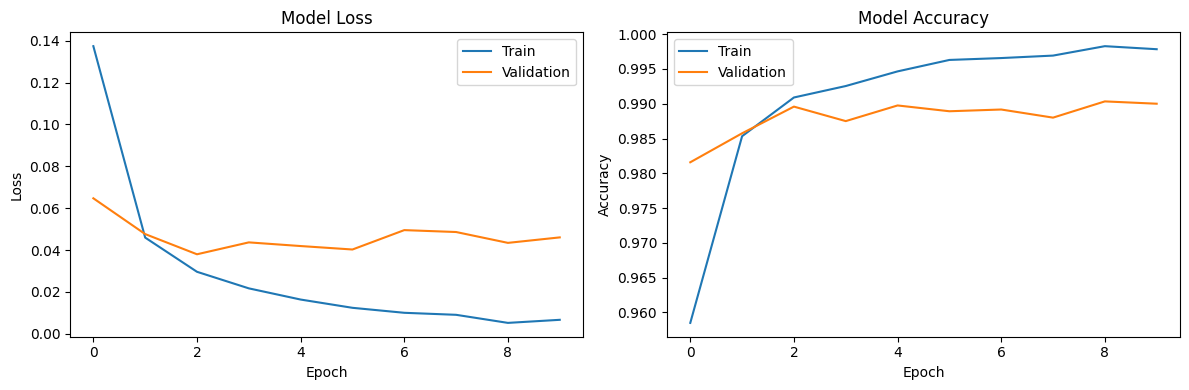

In [14]:
# 실습 2의 개선된 모델을 사용하여:
# 1. validation_split=0.2 사용
# 2. epochs=10으로 학습
# 3. history 객체 저장
# 4. loss와 accuracy 그래프 그리기

def plot_training_history(history):
    """학습 과정을 시각화하는 함수를 완성하세요"""
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Loss 그래프
    axes[0].plot(history.history['loss'])
    axes[0].plot(history.history['val_loss'])
    axes[0].set_title('Model Loss')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')
    axes[0].legend(['Train', 'Validation'])

    # Accuracy 그래프
    axes[1].plot(history.history['accuracy'])
    axes[1].plot(history.history['val_accuracy'])
    axes[1].set_title('Model Accuracy')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend(['Train', 'Validation'])

    plt.tight_layout()
    plt.show()

# 학습 실행
history = model_improved.fit(x_train, y_train, epochs=10, validation_split=0.2)
plot_training_history(history)

# 실습: 예측결과 시각화
목표: 모델의 예측 결과를 시각적으로 확인해보세요.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


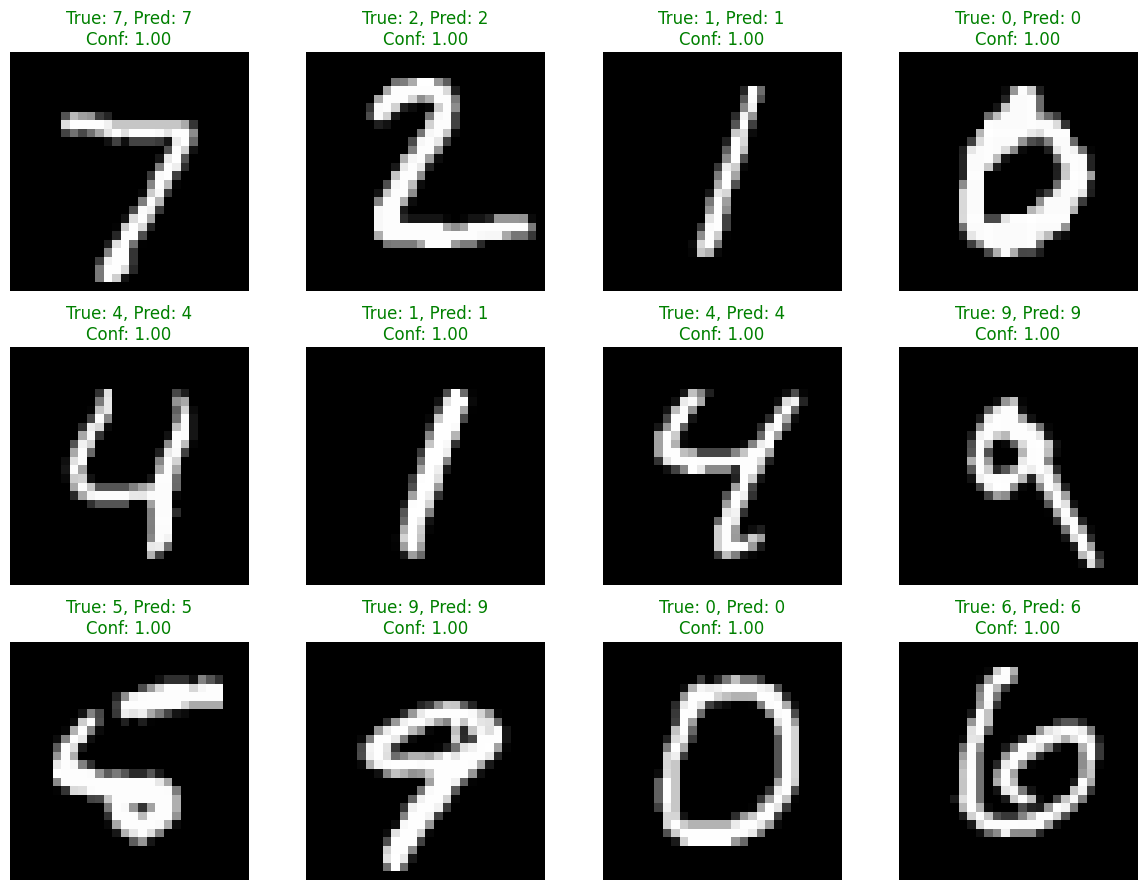

In [15]:
def visualize_predictions(model, x_test, y_test, num_samples=12):
    """예측 결과를 시각화하는 함수를 완성하세요"""
    predictions = model.predict(x_test[:num_samples])

    fig, axes = plt.subplots(3, 4, figsize=(12, 9))
    axes = axes.ravel()

    for i in range(num_samples):
        # 이미지 출력
        axes[i].imshow(x_test[i].reshape(28, 28), cmap='gray')

        # 예측값과 실제값 출력
        pred_class = np.argmax(predictions[i]) # 예측된 클래스를 구하세요
        true_class = y_test[i] # 실제 클래스를 구하세요
        confidence = np.max(predictions[i]) # 예측 확률의 최대값을 구하세요

        # 제목 설정 (맞으면 초록, 틀리면 빨강)
        color = 'green' if pred_class == true_class else 'red'
        axes[i].set_title(f'True: {true_class}, Pred: {pred_class}\nConf: {confidence:.2f}',
                         color=color)
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# 예측 결과 시각화
visualize_predictions(model_improved, x_test, y_test.argmax(axis=1))